# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##Relation Between Input and Target Variable

<Figure size 1600x800 with 0 Axes>

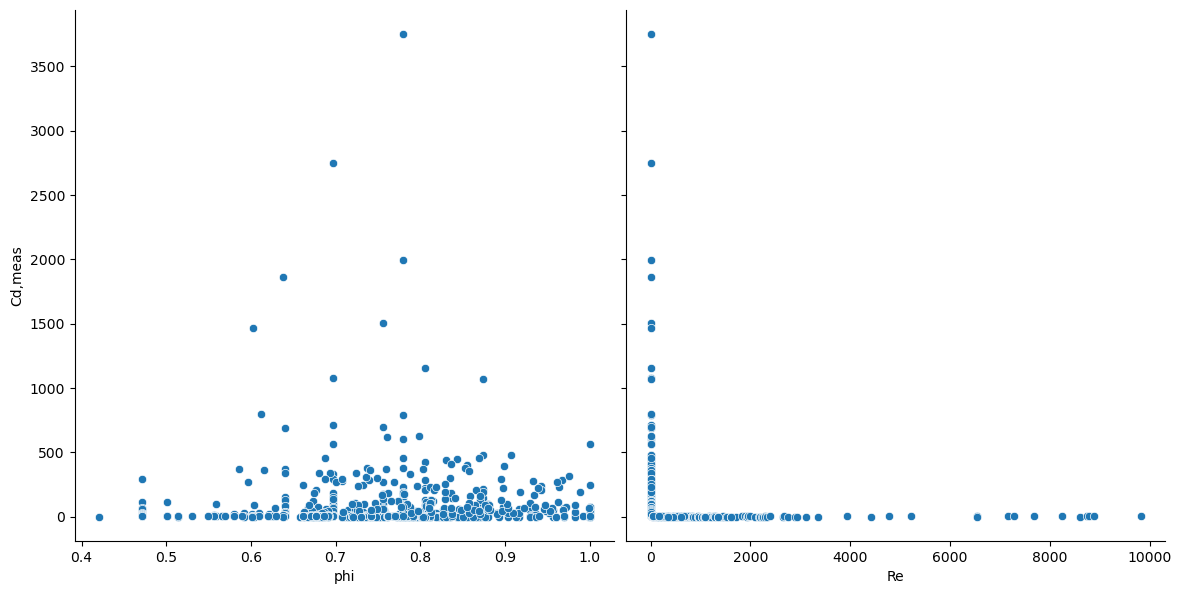

In [5]:
plt.figure(figsize=(16, 8))
sns.pairplot(dataset, x_vars=['phi','Re'], y_vars='Cd,meas', height=6, aspect=1, kind='scatter')
plt.show()

##Applying Lasso Regression

In [6]:
# Lasso + Linear Regression
lasso_linear = Lasso(alpha=0.1)
regressor=lasso_linear.fit(X_train, y_train)
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=10))
sel_.fit((X_train), y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=10))

In [7]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

##Selection of Features
sel_.get_support()

Coefficient: [ -5.5202152  -23.43823414]
Intercept: 80.09389577039282


array([ True,  True])

In [8]:
# list with the selected features and the outputs
selected_feat = sel_.get_support()

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(np.sum(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 2
selected features: 2
features with coefficients shrank to zero: 0


In [9]:
betas = []
penalties = [0, 0.0001, 0.001, 0.001, 0.1, 1]

X_train_df = pd.DataFrame(X_train, columns=['phi','Re'])

for penalty in penalties:

    pipe = Pipeline([
        ("lasso", Lasso(alpha=penalty, random_state=10))
    ])

    pipe.fit(X_train, y_train)

    betas.append(pd.Series(pipe.named_steps["lasso"].coef_))

betas = pd.concat(betas, axis=1)
betas.columns = [f"{penalty}" for penalty in penalties]
betas.index = X_train_df.columns
betas.head()

c:\Users\91897\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1474: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\91897\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\91897\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.011e+07, tolerance: 4.059e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

,0,0.0001,0.001,0.001,0.1,1
phi,-5.627206,-5.627099,-5.626136,-5.626136,-5.520215,-4.557297
Re,-23.545225,-23.545118,-23.544155,-23.544155,-23.438234,-22.475316


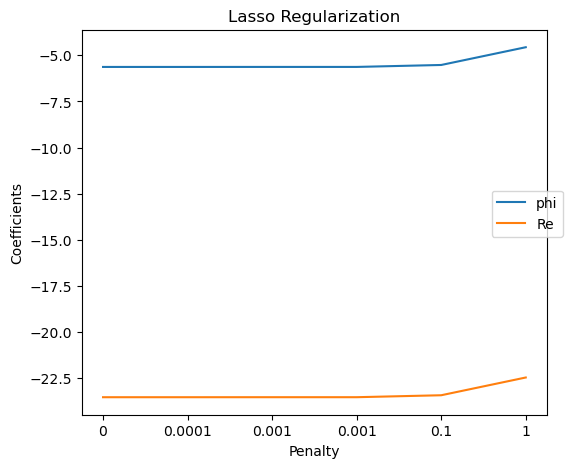

In [10]:
betas.T.plot(figsize=(6,5), legend=False)
plt.ylabel("Coefficients")
plt.xlabel("Penalty")
plt.title("Lasso Regularization")
plt.legend(X_train_df.columns,
           bbox_to_anchor = (1.05, 0.6))

## Predicting the Test set results

In [11]:
y_pred = lasso_linear.predict(X_test)
y_pred_train = lasso_linear.predict(X_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 8.15e+01  1.49e+00]
 [ 8.66e+01  2.20e+01]
 [ 8.53e+01  1.17e+01]
 [ 1.02e+02  6.23e+01]
 [ 8.20e+01  1.26e+00]
 [ 9.64e+01  1.92e+01]
 [ 8.66e+01  8.22e+01]
 [ 8.08e+01  2.24e+02]
 [ 7.63e+01  1.00e+00]
 [ 7.92e+01  5.26e+01]
 [ 9.02e+01  2.96e+02]
 [ 8.38e+01  6.92e+01]
 [ 5.61e+01  1.45e+00]
 [ 8.82e+01  1.07e+02]
 [ 7.71e+01  7.48e+01]
 [ 8.51e+01  5.42e+00]
 [ 1.02e+02  1.36e+01]
 [ 7.25e+01  1.03e+00]
 [ 8.53e+01  3.84e+00]
 [ 9.57e+01  2.69e+02]
 [ 8.26e+01  8.61e-01]
 [ 8.76e+01  6.20e+00]
 [ 1.02e+02  1.16e+02]
 [ 1.00e+02  5.61e+00]
 [ 8.66e+01  1.26e+01]
 [ 8.36e+01  1.44e+02]
 [ 8.51e+01  4.95e+00]
 [-5.72e+00  1.84e+00]
 [ 7.96e+01  1.29e+00]
 [ 8.80e+01  2.06e+00]
 [ 7.95e+01  8.64e-01]
 [ 7.87e+01  1.17e+00]
 [ 8.19e+01  7.14e+00]
 [ 7.67e+01  2.57e+00]
 [ 9.16e+01  1.12e+01]
 [ 8.90e+01  3.72e+01]
 [ 8.73e+01  2.56e+00]
 [ 8.20e+01  7.10e+01]
 [ 8.51e+01  3.12e+00]
 [ 8.42e+01  2.55e+01]
 [ 9.32e+01  5.73e+00]
 [ 9.07e+01  3.76e+01]
 [ 7.68e+01  1.18e+00]
 [ 9.07e+01

## Evaluating the Model Performance

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('MSE for Training set:', mean_squared_error(y_train, y_pred_train))
print('R_2 score for Training set:',r2_score(y_train, y_pred_train))

R_2 Score : -0.0008807435837168143
Mean Squared Error : 27675.533771170874
MSE for Training set: 60747.311114852986
R_2 score for Training set: 0.009275015063040626


##Plotting Results

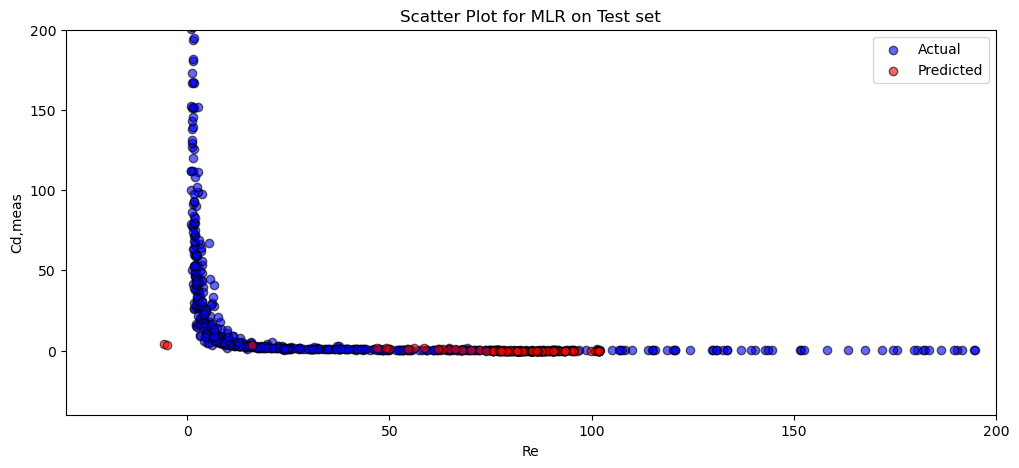

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' , edgecolors='black', alpha=0.6,label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for MLR on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [14]:
print('R_2 Score :', r2_score(y_pred, X_test[:,-1]))

R_2 Score : -32.535789358252124


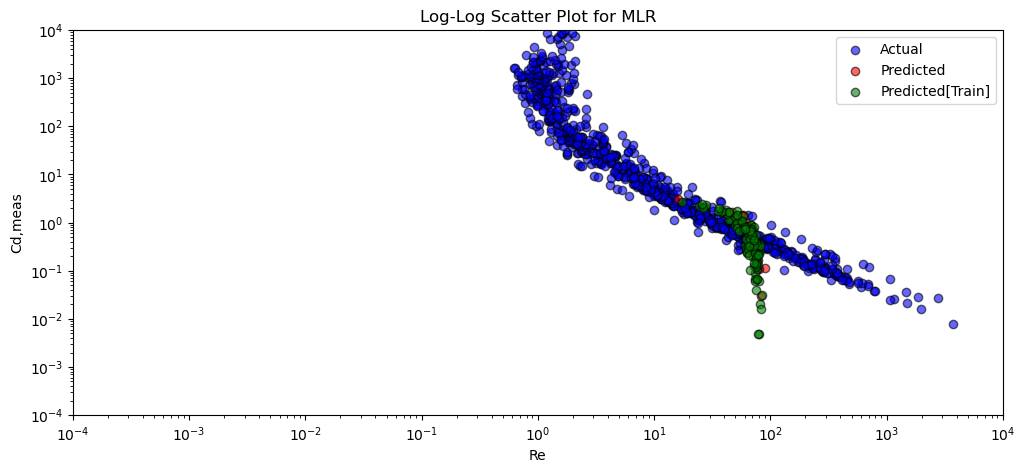

In [20]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted[Train]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001,10000)
plt.ylim(0.0001,10000)
plt.title('Log-Log Scatter Plot for MLR')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()
plt.show()

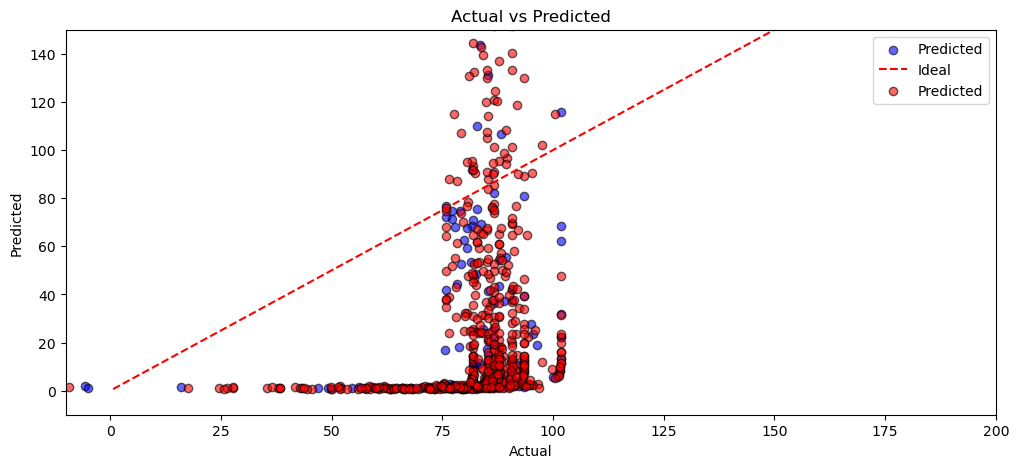

In [16]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(-10, 200)
plt.ylim(-10, 150)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

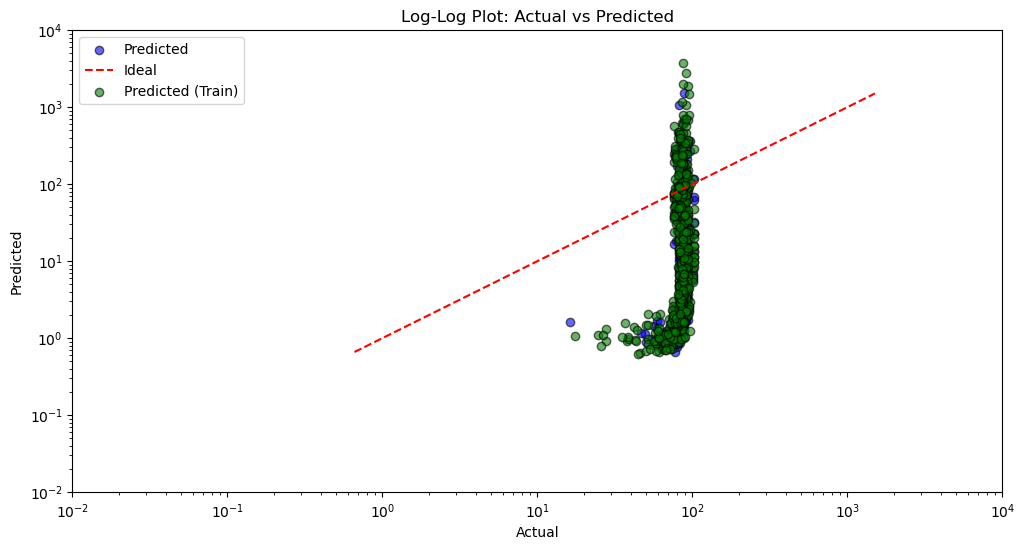

In [17]:
plt.figure(figsize=(12, 6))

plt.scatter(y_pred, y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0.01,10000)
plt.xlim(0.01,10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

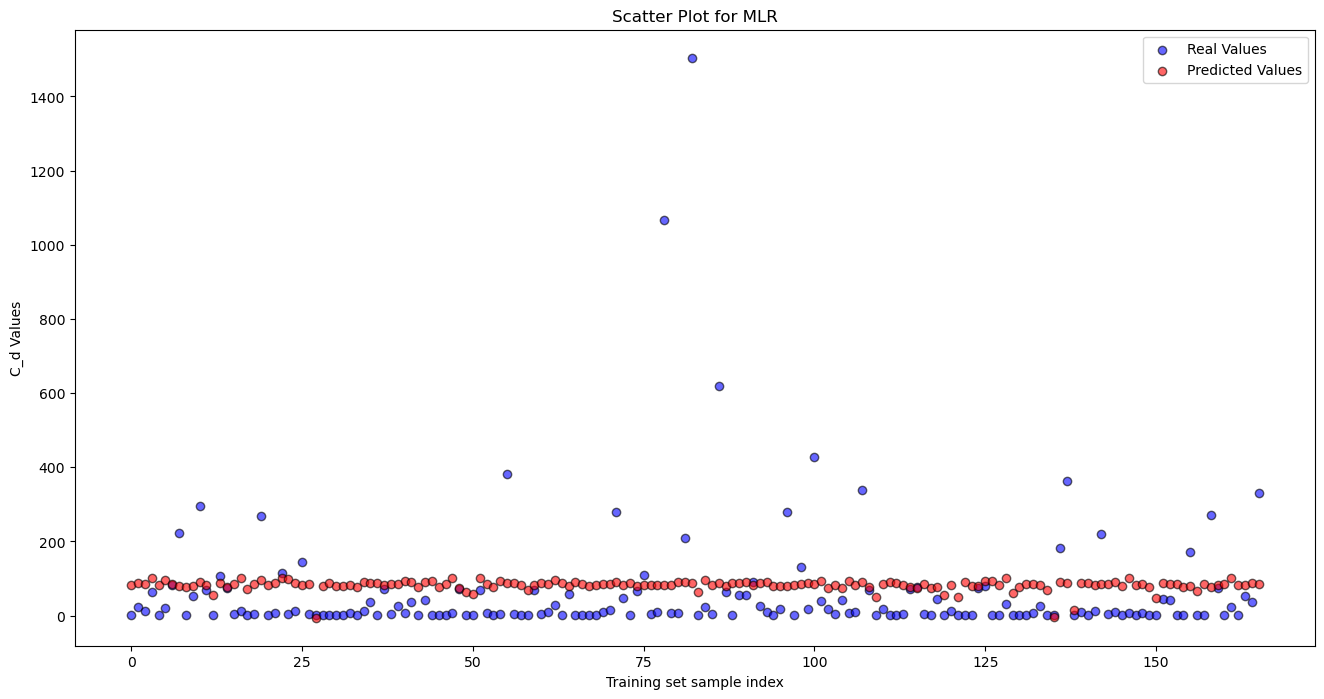

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for MLR')
plt.xlabel('Training set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

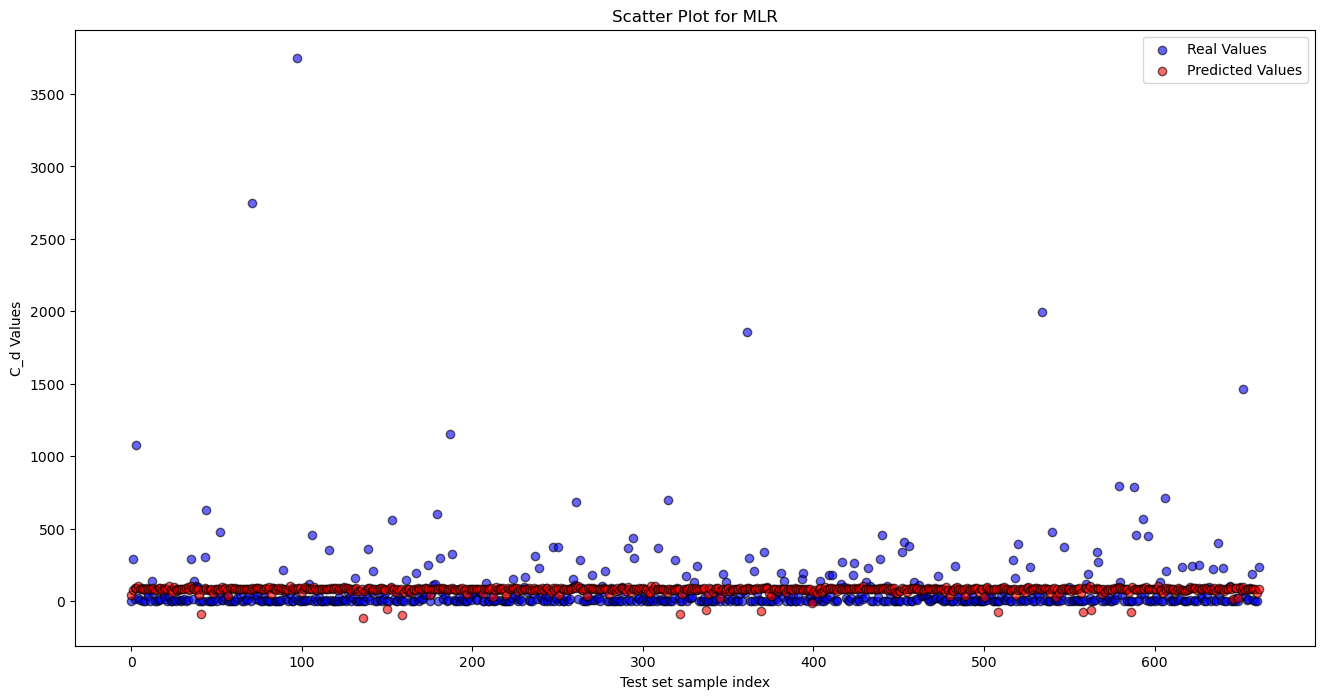

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for MLR')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()